## To see this same notebook without the output in LaTex view, see the Sympy_GRBfunctions notebook.

#### Those functions create usable output.

In [1]:
from __future__ import division
#from sympy import *
from sympy import exp, integrate, Integral, pi
from sympy import Symbol
from sympy.abc import a,b,x,y,z
from sympy.abc import x
from mpmath import gammainc
from sympy import init_printing
import matplotlib.pyplot as plt
%matplotlib inline
#init_printing(use_unicode=True, wrap_line=False, no_global=True)

## The Band Function

\begin{equation*}
f_{\text{BAND}}(E) = 
\end{equation*}



\begin{equation}
A 
\begin{cases} 
	\left( \frac{E}{100 \text{ keV}} \right) ^\alpha \text{ exp} \left[ -\frac{ \left( \alpha + 2 \right) E}{E_{peak}} \right], \\ 
		\ \ \ \ \ \  \text{ for } E < \frac{(\alpha - \beta) E_{peak}}{\alpha + 2} \\
		\left( \frac{E}{100 \text{ keV}} \right) ^\beta \text{ exp} \left( \beta - \alpha \right) 
	\left[ \frac{ \left( \alpha - \beta \right) E_{peak}}{100 \text{ keV} (\alpha + 2)} \right] ^{\alpha - \beta} .\\
		\ \ \ \ \ \  \text{ for } E \geqslant \frac{(\alpha - \beta) E_{peak}}{\alpha + 2}  \\
\end{cases}
\end{equation}

This model has four free parameters: the amplitude A (photons s$^{-1}$ cm$^{-2}$ keV$^{-1}$), the low-energy index $\alpha$, the high-energy index $\beta$, and the peak in the $\nu F_{\nu}$ spectrum, $E_{peak}$ (keV).  

$E_{peak}$ and the e-folding energy used in XSPEC, $E_0$, are related by the following equation,
\begin{equation}
E_0 = \frac{E_{peak}}{(\alpha + 2)}.  
\end{equation}
The ``break energy" is related to the photon energy $E_{peak}$ of the peak of the $\nu F_{\nu}$ spectrum by
\begin{equation}
E_{break} = \frac{(\alpha - \beta ) E_{peak}}{(\alpha + 2)} = E_0(\alpha - \beta).
\end{equation}

#### In order to integrate this equation in Wolfram Alpha or Python's sympy package, you'll need to break it into two parts for the integration, based on their conditions.  You will also need to simplify it as much as possible.

Substitute the e-folding energy in for peak energy over alpha + 2.

\begin{equation*}
f_{\text{BAND}}(E) = 
\end{equation*}



\begin{equation}
A 
\begin{cases} 
	\left( \frac{E}{100 \text{ keV}} \right) ^\alpha \text{ exp} \left[ -\frac{E}{E_0} \right], \\ 
		\ \ \ \ \ \  \text{ for } E < (\alpha - \beta) E_0 \\
		\left( \frac{E}{100 \text{ keV}} \right) ^\beta \text{ exp} \left( \beta - \alpha \right) 
	\left[ \frac{ \left( \alpha - \beta \right) E_0}{100 \text{ keV}} \right] ^{\alpha - \beta} .\\
		\ \ \ \ \ \  \text{ for } E \geqslant (\alpha - \beta) E_0  \\
\end{cases}
\end{equation}

Simplify this even more by substituting single letter variables for the parameters.


y = $\left( \alpha - \beta \right)$ 

z = $E_0$ 

x = $E$ 

a = $\alpha$ 

b = $\beta$ 

remove the 100 keV normalization factor that will cause a hangup in sympy, but Wolfram Alpha can handle it.  You will add it back on by introducing a factor of (100^ -alpha) after the integration is complete.  

The factor of (1/100)^alpha, when included in the integration, returns  (100^ -alpha).  For the comptonized model, this will show up again.  Make sure to keep track of the signs. Depending on if alpha is - or + to start with, that will change your sign after integration.

Remove the normalization (or Amplitude), $A$.  This parameter is intruduced as a nuience parameter that accounts for effects due to the detector, background, etc.
We only care about the model.

\begin{equation*}
f_{\text{BAND}}(E) = 
\end{equation*}



\begin{equation}
\begin{cases} 
	 x ^a \ \text{ exp} \left( -\frac{x}{z} \right), \\ 
		\ \ \ \ \ \  \text{ for lower part}
        \\
        \\
		x ^b \ \text{ exp} \left( -y \right) 
	\ \left( y z \right) ^y .\\
		\ \ \ \ \ \  \text{ for upper part}   \\
\end{cases}
\end{equation}

With the parameters plugged back in:

\begin{equation*}
f_{\text{BAND}}(E) = 
\end{equation*}



\begin{equation}
\begin{cases} 
	 E ^\alpha \ \text{ exp} \left( -\frac{E}{E_0} \right), \\ 
		\ \ \ \ \ \  \text{ for lower part}
        \\
        \\
		E ^\beta \ \text{ exp} \left( - \left( \alpha - \beta \right) \right)
	\ \left( \left( \alpha - \beta \right) E_0 \right) ^{\left( \alpha - \beta \right)} .\\
		\ \ \ \ \ \  \text{ for upper part}   \\
\end{cases}
\end{equation}

Set all variables as Symbols that are real and positive.

In [5]:
y = Symbol('y', real=True) # y - (alpha-beta) for the upper part
a = Symbol('a', positive=True, real=True) # a - alpha
b = Symbol('b', positive=True, real=True) # b - beta
z = Symbol('z', positive=True, real=True) # z - e0 = epeak/(alpha+2)
x = Symbol('x', positive=True, real=True) # x - energy

# integrate(y * ((x/100)**a)*(exp(-(x/z))), x)

We really want integrate
\begin{equation}
\int y \times \left( \frac{x}{100} \right)^a \times exp\left(-\frac{x}{z}\right) dx  
\end{equation}
to work, but the factor of (1/100)^a causes problems.

We just need to add on a factor of (100^(-a)) at the front of the ouput.  This will be the case for any function where we have a factor of (1/100)^a.

### Making the output look like LaTex eqauations -- 

In [12]:
init_printing(use_latex=True)

#### Calculating the lower part:

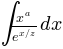

In [13]:
integ_lower = Integral((x**a)*(exp(-(x/z))), x); integ_lower

In [14]:
integ_lower.as_expr

<bound method Integral.as_expr of Integral(x**a*exp(-x/z), x)>

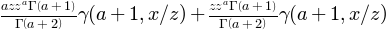

In [15]:
answer = integ_lower.doit(); answer

In [8]:
answer.as_expr

<bound method Add.as_expr of a*z*z**a*gamma(a + 1)*lowergamma(a + 1, x/z)/gamma(a + 2) + z*z**a*gamma(a + 1)*lowergamma(a + 1, x/z)/gamma(a + 2)>

In [8]:
lower = answer.simplify(); lower

In [9]:
lower.as_expr

<bound method Mul.as_expr of z**(a + 1)*lowergamma(a + 1, x/z)>

### I will get to what the $\gamma$ symbol represents later.

#### Now we calculate the upper part:

In [10]:
Integral(exp(-x), x).doit()

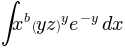

In [11]:
integ_upper = Integral(((x**b) * exp(-y) * (y*z)**(y)), x); integ_upper

In [12]:
integ_upper.as_expr

<bound method Integral.as_expr of Integral(x**b*(y*z)**y*exp(-y), x)>

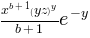

In [14]:
answer2 = integ_upper.doit(); answer2

In [15]:
answer2.as_expr

<bound method Mul.as_expr of x**(b + 1)*(y*z)**y*exp(-y)/(b + 1)>

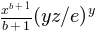

In [16]:
upper = answer2.simplify(); upper

In [17]:
upper.as_expr

<bound method Mul.as_expr of x**(b + 1)*(y*z*exp(-1))**y/(b + 1)>

#### Now we want to see what these look like with the actual parameter names.

In [18]:
a = Symbol('alpha', positive=True, real=True)
b = Symbol('beta', positive=True, real=True)
z = Symbol('E0', positive=True, real=True) # e0 = epeak/(alpha+2)
x = Symbol('E', positive=True, real=True) 
y = a-b
# E is an energy array that will be passed to the function after it has been integrated.

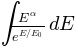

In [19]:
integ_lower = Integral(((x)**a)*(exp(-x/z)), x); integ_lower

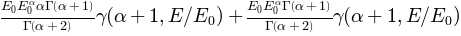

In [20]:
answer = integ_lower.doit(); answer

In [21]:
lower = answer.simplify(); lower

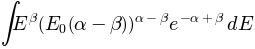

In [22]:
integ_upper = Integral( ((x**b) * exp(-y) * (y*z)**(y)), x); integ_upper

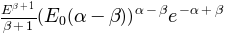

In [23]:
answer2 = integ_upper.doit(); answer2

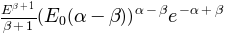

In [24]:
upper = answer2.simplify(); upper

### Now that we've shown you in pretty LaTex output, We need that output in a format that we can use as Python input.

In [25]:
# as expression.  
upper_expression = upper.as_expr()

In [26]:
print upper_expression

E**(beta + 1)*(E0*(alpha - beta))**(alpha - beta)*exp(-alpha + beta)/(beta + 1)


### If you start the session without the init_printing(), this printing will be the default, not the LaTex view.

In [27]:
# as expression.  
lower_expression = lower.as_expr()

In [28]:
print lower_expression

E0**(alpha + 1)*lowergamma(alpha + 1, E/E0)


## That $\gamma$ function we saw earlier is the Incomplete Gamma Function.
### The output says lowergamma, but we should use upppergamma.


#### You can use import sympy  then sympy.uppergamma() and sympy.lowergamma()

In [32]:
# !open ./

In [33]:
from mpmath import gammainc

Imagine that alpha = -1.342, E = 1000.0 keV and E0 = 592.738 keV.

Then lowergamma(alpha + 1, E/E0) is also

gammainc(alpha + 1, E/E0):

In [34]:
gammainc(-1.342 + 1.0, 1000.0/592.738 )

mpf('0.057128909548596361')

### In a usable format, use float() around it

In [35]:
float(gammainc(-1.342 + 1.0, 1000.0/592.738 ))

In [36]:
upper_expression = upper.as_expr()

In [37]:
lower

In [38]:
lower.args[0]

In [39]:
lower.args[1]

## Comptonized Model

The comptonized model (COMP) is an exponential cutoff power-law and is a version of the BAND function in the limit that $\beta$ $\rightarrow$ $-\infty$:

\begin{equation}
f_{\text{COMP}}(E) = A \left(\frac{E}{E_{piv}}\right)^{\alpha} \text{exp} \left[ - \frac{(\alpha + 2) E}{E_{peak}} \right].
\end{equation}

This model has three free parameters: the amplitude A (photons s$^{-1}$ cm$^{-2}$ keV$^{-1}$), the low-energy index $\alpha$ and the peak in the $\nu F_{\nu}$ spectrum, $E_{peak}$ (keV).  $E_{piv}$ is set to 100 keV, same as the PL model.  The COMP best fits dim bursts that lack high-energy emission required to constrain BANDs $\beta$.

\begin{equation}
f_{\text{COMP}}(E) = E^{\alpha} \ \text{exp} \left( - \frac{ E}{E_0} \right).
\end{equation}

 ## \*IMPORTANT NOTE\*:  
 ### You should be able to see that the Cutoff Power-Law (or Comptonized Power-Law) is the lower part of the Band Function.  So the integral already used for the lower part of BAND can be used here.

In [40]:
a = Symbol('alpha', positive=True, real=True)
z = Symbol('E0', positive=True, real=True) # e0 = epeak/(alpha+2)
x = Symbol('E', positive=True, real=True) 
# E is an energy array that will be passed to the function after it has been integrated.

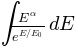

In [41]:
integ_copl = Integral( ((x**a) * exp(-x/z)), x); integ_copl

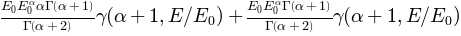

In [42]:
answer = integ_copl.doit(); answer

In [43]:
COPL = answer.simplify(); COPL

### Again, the $\gamma$ presented here is the Incomplete Gamma Function.  See the mpmath's gammainc function discussion above.

Since we'd reall like to include the (1/100)^a, but we can't becaumse sympy won't calculate it, we have to add on that factor of (100^a) to the front of the output.

## Power-Law Model

The most simple model is a single power-law and has only two free parameters,

\begin{equation}
f_{\text{PL}}(E) = A \left(\frac{E}{E_{piv}}\right)^{\alpha}
\end{equation}

which are A, the amplitude (photons s$^{-1}$ cm$^{-2}$ keV$^{-1}$), $\alpha$ is the spectral index, and the pivot energy $E_{piv}$ is set to 100 keV.  The pivot energy normalizes the model to the bandpass of the data.

In [44]:
a = Symbol('alpha', positive=True, real=True)
x = Symbol('E', positive=True, real=True) 

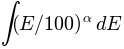

In [45]:
integ_pl = Integral( (x/100)**a, x); integ_pl

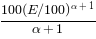

In [46]:
answer = integ_pl.doit(); answer

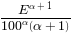

In [47]:
PL = answer.simplify(); PL

### Here I can demonstrate the factor of (1/100)^a because of how simple the power-law model is.  The result is a factor of 100^(-a), just as we see in the BAND Funciton and the Cutoff Power-Law function.

## Blackbody Model

The blackbody is a Planck-like function believed to represent the thermal emission from the jet's photosphere.  The fireball model predicts two components, a non-thermal synchrotron and a strong thermal component associated with the jet's photosphere, which would be observable when the ejecta layers become optically thin to Thompson scattering (Goodman 1986; M$\acute{e}$sz$\acute{a}$ros 2002; Rees $\&$ M$\acute{e}$sz$\acute{a}$ros 2005).


\begin{equation}
f_{\text{BBODY}}(E) = A \frac{E^{2}}{exp\left(\frac{E}{kT}\right)-1}
\end{equation}
This model has one free parameter, $kT$, and is always nested with one of the non-thermal synchrotron models listed above.

\begin{equation}
f_{\text{BBODY}}(E) = \frac{x^{2}}{exp\left(\frac{x}{y}\right)-1}
\end{equation}

## See also:
http://webcache.googleusercontent.com/search?q=cache:gz4pTM5COAkJ:csa.phys.uvic.ca/teaching/solve-problems-with-sympy/examples-of-problems-to-solve-with-sympy-live/at_download/file+&cd=4&hl=en&ct=clnk&gl=us

http://csa.phys.uvic.ca/teaching/solve-problems-with-sympy

In [48]:
x = Symbol('E', positive=True, real=True) # energy
y = Symbol('kT', positive=True, real=True) # kT

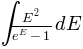

In [49]:
integrate((x**2)/(exp(x)-1), x)

In [55]:
from sympy import oo

In [56]:
top = integrate(x**3/(exp(x)-1),(x,0, oo))

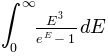

In [57]:
top

In [58]:
bottom = integrate(x**2/(exp(x)-1),(x,0,oo))

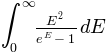

In [59]:
bottom

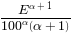

In [62]:
BBODY = answer.simplify(); BBODY

In [63]:
answer = integ_bbody.doit(); answer

NameError: name 'integ_bbody' is not defined

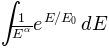

In [64]:
integ_lower = Integral((x**(-a))*(exp((x/z))), x); integ_lower

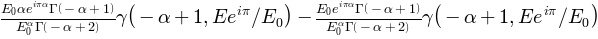

In [65]:
answer = integ_lower.doit(); answer

In [66]:
answer.simplify()